In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
from scipy.linalg import circulant
# for animation: credit notes of Nick Charlton, Jake Vanderplas, Louis Tiao

### Exercise 1 Solution

In [2]:
%%capture
fig = plt.figure();
fig.set_dpi(100);
fig.set_size_inches(7,7);
ax = plt.axes(xlim=(-1.2,1.2),ylim=(-1.2,1.2));
patch = plt.Circle((0,0),0.75,fc='none',ec='k',animated=True);
patch2 = plt.Circle((.75,0),0.25,fc='none',ec='k',animated=True);
patch3 = plt.Circle((1,0),0.05,fc='none',ec='k',animated=True);
patch4 = plt.Circle((1.05,0),0.02,fc='k',ec='k',animated=True);
patch7 = plt.Polygon(np.array([[1.05,0],[1.05,0],[1.05,0]]),
                     closed=False,fc='none',ec='k');

def animate(i):
    patch.center = (0, 0)
    x, y = patch2.center
    x = .75 * np.cos(np.radians(i))
    y = .75 * np.sin(np.radians(i))
    patch2.center = (x, y)
    x, y = patch3.center
    x = 0.75 * np.cos(np.radians(i)) + 0.25 * np.cos(np.radians(3*i))
    y = 0.75 * np.sin(np.radians(i)) - 0.25 * np.sin(np.radians(3*i))
    patch3.center = (x,y)
    x, y = patch4.center
    x = 0.75 * np.cos(np.radians(i)) + 0.25 * np.cos(np.radians(3*i))+\
        0.05*np.cos(np.radians(5*i))
    y = 0.75 * np.sin(np.radians(i)) - 0.25 * np.sin(np.radians(3*i))+\
        0.05*np.sin(np.radians(5*i))
    patch4.center = (x,y)
    xy = patch7.get_xy()
    xy = np.vstack((xy,np.array([x,y])))
    patch7.set_xy(xy)
    return [patch,patch2,patch3,patch4,patch7]
def init():
    patch.center = (0,0)
    patch2.center = (.75,0)
    patch3.center = (1,0)
    patch4.center = (1.05,0)
    ax.add_patch(patch)
    ax.add_patch(patch2)
    ax.add_patch(patch3)
    ax.add_patch(patch4)
    ax.add_patch(patch7)
    return [patch,patch2,patch3,patch4,patch7]
anim = animation.FuncAnimation(fig,animate,
            init_func=init,frames=360,interval=20,blit=True);

In [3]:
HTML(anim.to_html5_video())

### Exercise 2 Solution

First let's copy the code from the learning module:

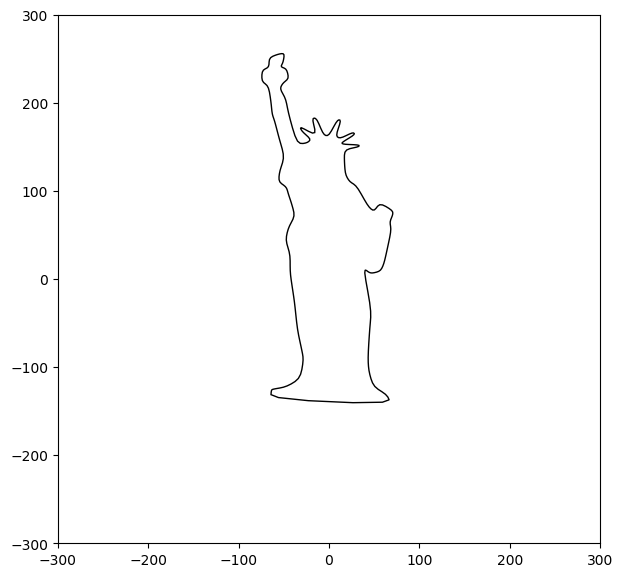

In [4]:
libertyZ0 = np.zeros([85,2])
libertyZ0[:,0] = [68.322,65.322,49.022,44.022,43.022,45.122,47.022,
                  38.022,44.222,48.122,57.022,60.922,64.622,69.022,
                  67.122,70.822,70.322,56.022,49.822,43.022,30.622,
                  22.922,18.022,17.022,17.022,33.022,33.822,14.922,
                  14.022,29.15,26.558,12.222,7.322,13.596,9.448,
                  -0.078,-5.978,-13.678,-19.068,-13.278,-32.548,
                  -30.178,-19.778,-24.178,-35.378,-44.978,-47.778,
                  -54.378,-51.178,-44.378,-46.778,-53.678,-50.778,
                  -48.978,-56.178,-66.378,-66.178,-74.178,-74.378,
                  -66.778,-63.978,-62.878,-60.078,-54.978,-48.978,
                  -54.678,-55.88,-46.978,-45.078,-41.378,-37.578,
                  -44.992,-48.103,-42.778,-43.078,-40.578,-37.978,
                  -34.978,-29.978,-28.078,-31.578,-47.678,-61.978,
                  -63.978,-64.278]
libertyZ0[:,1] = [-143.774,-131.874,-122.274,-104.974,-89.174,
                  -55.374,-35.974,12.626,7.326,6.626,8.926,17.626,
                  34.826,56.026,64.826,73.326,77.826,86.726,76.326,
                  82.726,106.026,110.326,118.626,134.026,147.026,
                  150.026,152.326,152.926,155.026,164.202,166.795,
                  159.226,162.526,180.275,181.312,162.526,163.026,
                  182.826,182.868,162.026,173.535,167.826,158.626,
                  154.326,153.126,188.526,204.926,215.926,222.326,
                  227.626,238.726,240.826,245.626,256.526,255.326,
                  251.326,240.326,237.226,224.026,219.326,200.026,
                  187.126,179.526,159.026,138.526,122.326,110.281,
                  104.626,96.926,85.826,71.526,58.433,43.916,28.026,
                  7.826,-9.474,-26.974,-57.474,-80.974,-91.374,-113.074,
                  -122.674,-124.974,-126.174,-137.574]

tt0 = np.linspace(0,1,85)
tt1 = np.linspace(0,1,301)

libertyZ0interp = np.zeros([301,2])
libertyZ0interp[:,0] = np.interp(tt1,tt0,libertyZ0[:,0])
libertyZ0interp[:,1] = np.interp(tt1,tt0,libertyZ0[:,1])

V = np.zeros(301)
V[0] = 0.25
V[1] = 0.5
V[2] = 0.25
C = circulant(V)
libertyZ0interp = C.dot(libertyZ0interp)
libertyZ0interp = C.dot(libertyZ0interp)

fig = plt.figure();
fig.set_dpi(100);
fig.set_size_inches(7,7);
ax = plt.axes(xlim=(-300,300),ylim=(-300,300));
libertypatch = plt.Polygon(libertyZ0interp,closed=True,fc='none',ec='k');
ax.add_patch(libertypatch)
plt.show()

Now evaluate the DFT and build an epicyclic reconstruction.

In [5]:
libertyZ0interpfft = np.fft.fft(libertyZ0interp[:,0]+1j*libertyZ0interp[:,1])
sz = libertyZ0interpfft.size
libertyZ0interpfft /= sz

In [6]:
offsetx = np.sum(libertyZ0interp[:,0])/sz
offsety = np.sum(libertyZ0interp[:,1])/sz

In [7]:
%%capture
N = 180
fig = plt.figure();
fig.set_dpi(100);
fig.set_size_inches(7,7);
ax = plt.axes(xlim=(-300,300),ylim=(-300,300));
patches = np.array([])
freqs = np.array([])
coeffs = np.array([])
for i in range(N+1):
    if i%2 == 0:
        coeffs = np.append(coeffs,libertyZ0interpfft[-int(i/2)-1])
        freqs = np.append(freqs,-int(i/2)-1)
    else:
        coeffs = np.append(coeffs,libertyZ0interpfft[int(i/2)+1])
        freqs = np.append(freqs,int((i-1)/2)+1)

radii = np.abs(coeffs)
freqs /= 40

# sort by radii
bigarray = np.vstack((radii,coeffs.real,coeffs.imag,freqs)).T
bigarray = bigarray[bigarray[:,0].argsort()[::-1]]
    # courtesy Steve Tjoa, stackoverflow 5.13.2010
radii = bigarray[:,0]
coeffs = bigarray[:,1]+1j*bigarray[:,2]
freqs = bigarray[:,3]


# create initial patches
stationary_circle = plt.Circle((offsetx,offsety),radii[0],fc='none',ec='k');
for i in range(N):
    patches = np.append(patches,
            plt.Circle((offsetx,offsety),radii[i+1],fc='none',ec='k',animated=True));

# outline patch
patchM = plt.Polygon(np.array([[-65,-135],[-65,-135],[-65,-135]]),
                     closed=False,fc='none',ec='k');

def animate(i):
    x = offsetx
    y = offsety
    for k in range(N):
        zk = coeffs[k] * np.exp(1j*freqs[k]*i)
        x += zk.real
        y += zk.imag
        patches[k].center = (x,y)
    
    xy = patchM.get_xy()
    xy = np.vstack((xy,np.array([x,y])))
    patchM.set_xy(xy)
    return np.append(np.append(patches,patchM),stationary_circle)
def init():
    for k in range(N):
        patches[k].center = (offsetx,offsety)
        ax.add_patch(patches[k])
    ax.add_patch(patchM)
    ax.add_patch(stationary_circle)
    return np.append(np.append(patches,patchM),stationary_circle)
anim = animation.FuncAnimation(fig,animate,
            init_func=init,frames=360,interval=20,blit=True);

In [8]:
HTML(anim.to_html5_video())